In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('./data/train.csv', index_col='ID')
train.shape

(4459, 4992)

In [3]:
test = pd.read_csv('./data/test.csv', index_col='ID')
test.shape

(49342, 4991)

In [4]:
def describeplus(dataset, target='target'):
    df = dataset.describe().T
    df = df.reset_index().rename(columns = {'index' : 'columns'})
    ## Correlation to the target
    df['target_corr'] = df['columns'].apply(lambda x : np.corrcoef(dataset[target], dataset[x])[0][1])
    ## distinct counts
    df['distinct_counts'] = df['columns'].apply(lambda x : len(dataset[x].value_counts()))
    ## skew
    df['skew'] = df['columns'].apply(lambda x : dataset[x].skew())
    
    ## data range
    df['range'] = df['columns'].apply(lambda x : dataset[x].max() - dataset[x].min())
    return df

df = describeplus(train)
df.head()

,columns,count,mean,std,min,25%,50%,75%,max,target_corr,distinct_counts,skew,range
0,target,4459.0,5.944923e+06,8.234312e+06,30000.0,600000.0,2260000.0,8000000.0,40000000.0,1.000000,1413,2.085967,39970000.0
1,48df886f9,4459.0,1.465493e+04,3.893298e+05,0.0,0.0,0.0,0.0,20000000.0,0.010188,32,39.206027,20000000.0
2,0deb4b6a8,4459.0,1.390895e+03,6.428302e+04,0.0,0.0,0.0,0.0,4000000.0,0.013805,5,56.293867,4000000.0
3,34b15f335,4459.0,2.672245e+04,5.699652e+05,0.0,0.0,0.0,0.0,20000000.0,0.014694,29,29.161984,20000000.0
4,a8cb14b00,4459.0,4.530164e+03,2.359124e+05,0.0,0.0,0.0,0.0,14800000.0,-0.002917,3,58.043719,14800000.0


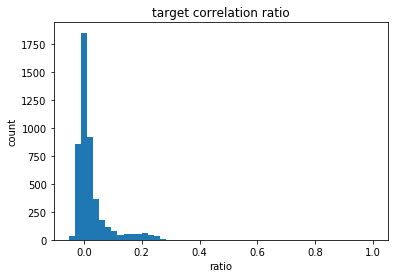

In [5]:
df['target_corr'].plot.hist(bins=50)
plt.title('target correlation ratio')
plt.xlabel('ratio')
plt.ylabel('count')
plt.show()

In [6]:
df[['skew']].describe()

,skew
count,4992.000000
mean,30.647812
std,18.749030
min,0.000000
25%,16.681499
50%,25.963796
75%,44.103054
max,66.775744


Text(0,0.5,'target correlation ratio')

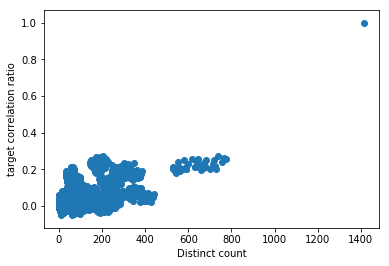

In [7]:
#df['distinct_counts'].plot.hist(bins=50)
plt.scatter(x=df['distinct_counts'], y=df['target_corr'])
plt.xlabel('Distinct count')
plt.ylabel('target correlation ratio')

(1837, 13)

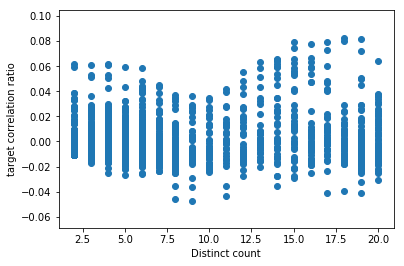

In [8]:
subset = df[df['distinct_counts'] <=20]
plt.scatter(x=subset['distinct_counts'], y=subset['target_corr'])
plt.xlabel('Distinct count')
plt.ylabel('target correlation ratio')
subset.shape

In [9]:
train.head()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
ID,,,,,,,,,,,,,,,,,,,,,
000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,2200000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,2000000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [10]:
from scipy.special import inv_boxcox
from scipy import stats

In [54]:
# Matrix definition
cols = [x for x in train.columns if x != 'target']
Xtrain = train[cols]
Xtest  = test[cols]
ynormal =train['target']
ybc, lmbda = stats.boxcox(train['target'])
Xtrain.shape

(4459, 4991)

In [55]:
#Decides if BOXCOX or not
y = ybc #ynormal

In [12]:
Xtrain.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
ID,,,,,,,,,,,,,,,,,,,,,
000d6aaf2,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
000fbd867,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
0027d6b71,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
0028cbf45,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
002a68644,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


# Pipe feature creation

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin

In [14]:
class Cleanerplus(BaseEstimator, TransformerMixin):
    """Drops the not relevant features"""
    def __init__(self, distinctmin=5, target='target'):
        self.distinctmin = distinctmin
        self.target = target
        self.columns = []
    
    def fit(self, X, y=None):
        df = pd.DataFrame({'columns':X.columns.values})
        ## distinct counts
        df['distinct_counts'] = df['columns'].apply(lambda x : len(X[x].value_counts()))
        subset = df[df['distinct_counts'] > self.distinctmin]
        #print(subsset[])
        self.columns = subset['columns'].tolist()
        
        return self
    
    def transform(self, X, y=None):
        return X[self.columns]
        
cleanerplus = Cleanerplus()
Xclean = cleanerplus.fit_transform(Xtrain)
Xtestclean = cleanerplus.transform(Xtest)
Xclean.shape

(4459, 3952)

In [15]:
Xtestclean.shape

(49342, 3952)

In [16]:
from sklearn.preprocessing import StandardScaler

class Featureplus(BaseEstimator, TransformerMixin):
    """Scaling and addition of some engineered feature"""
    def __init__(self):
        self.scaler = StandardScaler()
        self.columns = []
    
    def fit(self, X, y=None):
        self.columns = X.columns
        self.scaler.fit(X[self.columns])
        return self
    
    def transform(self, X, y=None):
        indexes = X.index
        Xscaled = self.scaler.transform(X[self.columns])
        df = pd.DataFrame(Xscaled, columns=self.columns, index = indexes)
        # Min
        df['min'] = df.apply(min, axis=1)
        # Max
        df['max'] = df.apply(max, axis=1)
        # Med
        df['med'] = df.apply(np.median, axis=1)
        # std
        df['std'] = df.apply(np.std, axis=1)
        # mean
        df['mean'] = df.apply(np.mean, axis=1)
        return df

featureplus = Featureplus()
Xfeat = featureplus.fit_transform(Xclean)
print('fit done')
Xtestfeat = featureplus.transform(Xtestclean)
Xfeat.head()

fit done


,48df886f9,34b15f335,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,8d6c2a0b2,...,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466,min,max,med,std,mean
ID,,,,,,,,,,,,,,,,,,,,,
000d6aaf2,-0.037646,-0.04689,-0.017437,-0.053221,-0.022451,-0.024846,-0.267393,-0.097765,-0.081369,-0.028876,...,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852,-0.303641,11.898286,-0.067875,0.408730,-0.047133
000fbd867,-0.037646,-0.04689,-0.017437,-0.053221,-0.022451,-0.024846,-0.038443,-0.097765,-0.081369,-0.028876,...,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852,-0.312210,24.849548,-0.068376,0.673509,-0.042430
0027d6b71,-0.037646,-0.04689,-0.017437,-0.053221,-0.022451,-0.024846,-0.267393,-0.097765,-0.081369,-0.028876,...,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852,-0.317181,1.735534,-0.069433,0.083112,-0.077464
0028cbf45,-0.037646,-0.04689,-0.017437,-0.053221,-0.022451,-0.024846,-0.267393,-0.097765,-0.081369,-0.028876,...,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852,-0.317181,9.533153,-0.069720,0.223669,-0.075159
002a68644,-0.037646,-0.04689,-0.017437,-0.053221,-0.022451,-0.024846,-0.059257,-0.097765,-0.081369,-0.028876,...,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852,-0.317181,5.225917,-0.069337,0.174926,-0.072679


In [17]:
Xfeat.shape

(4459, 3957)

In [18]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

class Kmeansplus(BaseEstimator, TransformerMixin):
    """Kmeans clustering with engineered features per cluster"""
    def __init__(self, clustsize=[ 5, 10, 15, 20], pca_var_min=.50):
        self.clustsize = clustsize
        self.columns = []
        self.pca = PCA(random_state=55)
        self.pca_var_min = pca_var_min
    
    def fit(self, X, y=None):
        self.columns = X.columns.tolist()
        
        self.pca.fit(X)
        var = self.pca.explained_variance_ratio_.cumsum()
        components = np.where(var>self.pca_var_min)[0][0]
        self.pca.set_params(n_components = components)
        Xpca = self.pca.fit_transform(X)
        
        
        for index, clustsize in enumerate(self.clustsize):
            #print(index, clustsize)
            setattr(self, f'cluster_{index}', KMeans(n_clusters=clustsize, random_state=0))
            getattr(self, f'cluster_{index}').fit(Xpca)
            
            for counter in range(clustsize):
                self.columns.append(f'clust-{clustsize}_{counter}')
            
        return self
    
    def transform(self, X, y=None):
        df = X.copy()
        Xpca = self.pca.transform(X)
        
        for index, clustsize in enumerate(self.clustsize):
            predictions = getattr(self, f'cluster_{index}').predict(Xpca)
            columnname = f'clust-{clustsize}'
            df[columnname] = predictions
            df[columnname] = df[columnname].astype(str)
        
        df = pd.get_dummies(df, prefix=None, prefix_sep='_')
        
        missing = [x for x in self.columns if x not in df.columns]
        
        if len(missing)!=0:
            print('df corrected')
            df = df.add(pd.DataFrame(np.full((X.shape[0],len(missing)), 0), columns=missing, index=X.index), fill_value=0, axis=1)
        
        return df[self.columns]

    
kmeansplus = Kmeansplus()
Xfinal = kmeansplus.fit_transform(Xfeat)
print('fiting done !')
Xtestfinal = kmeansplus.transform(Xtestfeat)
Xfinal.head()

fiting done !
df corrected


,48df886f9,34b15f335,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,8d6c2a0b2,...,clust-20_10,clust-20_11,clust-20_12,clust-20_13,clust-20_14,clust-20_15,clust-20_16,clust-20_17,clust-20_18,clust-20_19
ID,,,,,,,,,,,,,,,,,,,,,
000d6aaf2,-0.037646,-0.04689,-0.017437,-0.053221,-0.022451,-0.024846,-0.267393,-0.097765,-0.081369,-0.028876,...,0,0,0,0,0,0,0,0,0,0
000fbd867,-0.037646,-0.04689,-0.017437,-0.053221,-0.022451,-0.024846,-0.038443,-0.097765,-0.081369,-0.028876,...,0,0,0,0,0,0,0,0,0,0
0027d6b71,-0.037646,-0.04689,-0.017437,-0.053221,-0.022451,-0.024846,-0.267393,-0.097765,-0.081369,-0.028876,...,0,0,0,0,0,0,0,1,0,0
0028cbf45,-0.037646,-0.04689,-0.017437,-0.053221,-0.022451,-0.024846,-0.267393,-0.097765,-0.081369,-0.028876,...,0,0,0,0,0,0,0,1,0,0
002a68644,-0.037646,-0.04689,-0.017437,-0.053221,-0.022451,-0.024846,-0.059257,-0.097765,-0.081369,-0.028876,...,0,0,0,0,0,0,0,1,0,0


In [19]:
Xtestfinal.shape

(49342, 4007)

# Feature assembly

In [20]:
from sklearn.pipeline import Pipeline

In [23]:
cleanerplus = Cleanerplus(distinctmin=2, target='target')
featureplus = Featureplus()
kmeansplus = Kmeansplus(clustsize=[ 5, 10, 15, 20], pca_var_min=.90)
pipe = [('cleanerplus',cleanerplus), ('featureplus',featureplus), ('kmeansplus',kmeansplus)]
pipeline = Pipeline(pipe)

In [24]:
Xtranstrain = pipeline.fit_transform(Xtrain)
Xtranstrain.shape

(4459, 4545)

In [25]:
Xtranstest = pipeline.transform(Xtest)
Xtranstest.shape

df corrected


(49342, 4545)

In [26]:
pipeline

Pipeline(memory=None,
     steps=[('cleanerplus', Cleanerplus(distinctmin=2, target='target')), ('featureplus', Featureplus()), ('kmeansplus', Kmeansplus(clustsize=[5, 10, 15, 20], pca_var_min=0.9))])

In [27]:
Xtest.shape

(49342, 4991)

In [28]:
Xtrain.shape

(4459, 4991)

# Regressions

In [59]:
n_jobs=-2
max_evals=50
n_splits=3
metric = 'neg_mean_squared_error'#'neg_mean_squared_log_error'

## Metrics and KFolds

In [60]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=n_splits)

In [31]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from sklearn.model_selection import cross_val_score

## Elasticnet...

In [95]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
enet.fit(Xtranstrain, y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [101]:
counter=0
bestscore = 1e20
def objective(params):
    global counter, bestscore
    counter +=1
    hyperparams = {
        'alpha': params['alpha'],
        'l1_ratio': params['l1_ratio'],
        'random_state':0,

        }
    
    enet = ElasticNet(**hyperparams)   
    
    score = cross_val_score(enet, Xtranstrain, y, scoring=metric, cv=kf, n_jobs=n_jobs, verbose=0).mean()
    #if counter%5 == 0:
    #    print("{} - MSE {}".format(counter, -score))
    if -score < bestscore:
        print("Attempt {} - MSE {} - params {}".format(counter, -score, hyperparams))
        print()
        bestscore = -score
    else:
        print('Attempt {}'.format(counter))
    return -score

space = {
    'alpha': hp.uniform('alpha', 0, 1),
    'l1_ratio': hp.uniform('l1_ratio',0, 1),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=max_evals)

Attempt 1 - MSE 72.61594981881011 - params {'alpha': 0.3672082909245594, 'l1_ratio': 0.36295627757554483, 'random_state': 0}

Attempt 2
Attempt 3
Attempt 4
Attempt 5


/Users/cricket/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/cricket/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Attempt 6
Attempt 7
Attempt 8
Attempt 9
Attempt 10
Attempt 11 - MSE 72.46933382422013 - params {'alpha': 0.9562870320953234, 'l1_ratio': 0.17554363363054803, 'random_state': 0}

Attempt 12
Attempt 13
Attempt 14
Attempt 15


/Users/cricket/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/cricket/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Attempt 16
Attempt 17
Attempt 18
Attempt 19
Attempt 20 - MSE 72.16752135424392 - params {'alpha': 0.876187948620709, 'l1_ratio': 0.16033917867820713, 'random_state': 0}



/Users/cricket/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/cricket/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Attempt 21


/Users/cricket/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/cricket/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Attempt 22
Attempt 23 - MSE 72.02635710195241 - params {'alpha': 0.9390510345013042, 'l1_ratio': 0.1294424555330282, 'random_state': 0}

Attempt 24
Attempt 25
Attempt 26
Attempt 27
Attempt 28


/Users/cricket/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/cricket/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Attempt 29
Attempt 30
Attempt 31
Attempt 32
Attempt 33


/Users/cricket/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/cricket/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Attempt 34
Attempt 35 - MSE 72.01410151683469 - params {'alpha': 0.7949866630830508, 'l1_ratio': 0.1269437708299042, 'random_state': 0}

Attempt 36
Attempt 37
Attempt 38
Attempt 39
Attempt 40
Attempt 41 - MSE 71.97939086676578 - params {'alpha': 0.9296310459953416, 'l1_ratio': 0.12054711011836194, 'random_state': 0}

Attempt 42
Attempt 43
Attempt 44
Attempt 45
Attempt 46
Attempt 47
Attempt 48
Attempt 49


/Users/cricket/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/cricket/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Attempt 50


In [102]:
params = {
        'alpha': best['alpha'],
        'l1_ratio': best['l1_ratio'],
        'random_state':0,
        }
params

{'alpha': 0.9296310459953416,
 'l1_ratio': 0.12054711011836194,
 'random_state': 0}

In [103]:
enet = ElasticNet(**params)
enet.fit(Xtranstrain, y)

ElasticNet(alpha=0.9296310459953416, copy_X=True, fit_intercept=True,
      l1_ratio=0.12054711011836194, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.0001, warm_start=False)

In [121]:
from scipy.special import inv_boxcox

preds = inv_boxcox(enet.predict(Xtranstest), lmbda)
submission = pd.DataFrame({'target':preds}, index=Xtest.index)
submission.head()
#submission.to_csv('submission-2-LGBM.csv')

,target
ID,
000137c73,6.199856e+05
00021489f,1.908826e+06
0004d7953,2.431719e+06
00056a333,2.776807e+06
00056d8eb,2.574679e+06


In [125]:
submission.isnull().sum()

target    0
dtype: int64

In [124]:
submission.to_csv('submission-1-elasticnet.csv')

## LGBM

In [32]:
import lightgbm as lgb

gbm = lgb.LGBMRegressor()

In [71]:
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_predict

counter=0
bestscore = 1e20
def objective(params):
    global counter, bestscore
    counter +=1
    hyperparams = {
        'num_leaves': int(params['num_leaves']),
        'min_data_in_leaf': int(params['min_data_in_leaf']),
        'min_child_weight': params['min_child_weight'],
        'n_estimators':500,
        'colsample_bytree': params['colsample_bytree'],
        #'bagging_fraction': params['bagging_fraction'],
        #'bagging_freq': params['bagging_freq'],
        #'reg_alpha': params['reg_alpha'],
        #'reg_lambda': params['reg_lambda'],
        'max_depth':10,#int(params['max_depth']),
        #'learning_rate':params['learning_rate'],
        'seed':0,
        }
    
    gbm = lgb.LGBMRegressor(objective='regression', **hyperparams)

    #score = cross_val_score(gbm, Xtranstrain, y, scoring=metric, cv=kf, n_jobs=n_jobs, verbose=0).mean()
    
    preds = cross_val_predict(gbm, Xtranstrain, y, cv=kf, n_jobs=n_jobs)
    score = mean_squared_log_error(inv_boxcox(y, lmbda), inv_boxcox(preds, lmbda))
    
    if counter%5 == 0:
        print("{} - MSLE {} - best score {}".format(counter, score, bestscore))
    if score < bestscore:
        print("Attempt {} - MSLE {} - params {}".format(counter, score, hyperparams))
        print()
        bestscore = score
    return score

space = {
    'num_leaves': hp.uniform('num_leaves', 30, 600),
    'min_data_in_leaf': hp.uniform('min_data_in_leaf',10, 100),
    'min_child_weight': hp.loguniform('min_child_weight', -8, 2),
    #'n_estimators': hp.uniform('n_estimators', 100, 5000),
    'colsample_bytree': hp.uniform('colsample_bytree', 0., 1.0),
    #'bagging_fraction': hp.uniform('bagging_fraction', 0., 1.0),
    #'bagging_freq': hp.randint('bagging_freq', 15),
    #'reg_alpha': hp.loguniform('reg_alpha', -3, 3),
    #'reg_lambda': hp.loguniform('reg_lambda', -3, 3),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=max_evals)

Attempt 1 - MSLE 2.231294512802875 - params {'num_leaves': 72, 'min_data_in_leaf': 63, 'min_child_weight': 0.0790552052543238, 'n_estimators': 500, 'colsample_bytree': 0.6550272729159825, 'max_depth': 10, 'seed': 0}

Attempt 2 - MSLE 2.220518568772521 - params {'num_leaves': 365, 'min_data_in_leaf': 28, 'min_child_weight': 0.03634115242149104, 'n_estimators': 500, 'colsample_bytree': 0.722537579811914, 'max_depth': 10, 'seed': 0}

5 - MSLE 2.1864531867931007 - best score 2.220518568772521
Attempt 5 - MSLE 2.1864531867931007 - params {'num_leaves': 318, 'min_data_in_leaf': 21, 'min_child_weight': 4.543152885998747, 'n_estimators': 500, 'colsample_bytree': 0.37322295086750135, 'max_depth': 10, 'seed': 0}

10 - MSLE 2.223988326687751 - best score 2.1864531867931007
15 - MSLE 2.180054447834841 - best score 2.1864531867931007
Attempt 15 - MSLE 2.180054447834841 - params {'num_leaves': 394, 'min_data_in_leaf': 20, 'min_child_weight': 5.955895443827464, 'n_estimators': 500, 'colsample_bytree'

In [72]:
params = {
        'num_leaves': int(best['num_leaves']),
        'min_data_in_leaf': int(best['min_data_in_leaf']),
        'min_child_weight': best['min_child_weight'],
        'n_estimators':500,
        'max_depth':10,
        'colsample_bytree': best['colsample_bytree'],
        #'bagging_fraction': best['bagging_fraction'],
        #'bagging_freq': best['bagging_freq'],
        #'reg_alpha': best['reg_alpha'],
        #'reg_lambda': best['reg_lambda'],
        'seed':0,
        }
params

{'colsample_bytree': 0.009892260823263652,
 'max_depth': 10,
 'min_child_weight': 0.46487174970619644,
 'min_data_in_leaf': 15,
 'n_estimators': 500,
 'num_leaves': 487,
 'seed': 0}

In [37]:
#params = {'num_leaves': 126, 'min_data_in_leaf': 39, 'min_child_weight': 6.536289958679432, 'n_estimators': 750, 'colsample_bytree': 0.1160063292528698, 'bagging_fraction': 0.8932028860054155, 'bagging_freq': 0, 'max_depth': 15, 'seed': 0}

In [75]:
hypergbm = lgb.LGBMRegressor(objective='regression', **params)

In [76]:

hypergbm.fit(Xtranstrain,y)

LGBMRegressor(boosting_type='gbdt', class_weight=None,
       colsample_bytree=0.009892260823263652, learning_rate=0.1,
       max_depth=10, min_child_samples=20,
       min_child_weight=0.46487174970619644, min_data_in_leaf=15,
       min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=487,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, seed=0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)

In [77]:
from scipy.special import inv_boxcox
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_predict

preds = cross_val_predict(hypergbm, Xtranstrain, y, cv=kf, n_jobs=-2)
preds = inv_boxcox(preds, lmbda)

mean_squared_log_error(inv_boxcox(y, lmbda), preds)


2.134242514927304

In [78]:
hypergbm.fit(Xtranstrain,y)

preds = inv_boxcox(hypergbm.predict(Xtranstest), lmbda)
submission = pd.DataFrame({'target':preds}, index=Xtest.index)
submission.head()

,target
ID,
000137c73,4.489507e+06
00021489f,3.043157e+06
0004d7953,2.689425e+06
00056a333,4.722499e+06
00056d8eb,3.129871e+06


In [79]:
submission.isnull().sum()

target    0
dtype: int64

In [80]:
submission.to_csv('submission-G2-01-LGBM.csv')